In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data loading

In [2]:
bac=pd.read_csv('bacteria.info.tsv',sep='\t',index_col=0)
metadata=pd.read_csv('..\\HGF\\species_wildbiome_info.csv',index_col=0)

In [3]:
bac['sample'] = bac.index.str.extract(r'~_~([A-Za-z0-9_]+?)(?:_combined|_SemiBin|\.metabat)')[0].values

# Bacteria Composition

In [4]:
metadata.loc[len(metadata)] ={'ZA_number':'BALB_c_1','Susceptibility (Broad)':'extremely_resistant',
                                  'Animal Species':'inbred strain mouse','Animal class/order':'Rodentia','diet classification':'Herbivore'}
metadata.loc[len(metadata)] ={'ZA_number':'BALB_c_2','Susceptibility (Broad)':'extremely_resistant',
                                  'Animal Species':'inbred strain mouse','Animal class/order':'Rodentia','diet classification':'Herbivore'}
metadata.loc[len(metadata)] ={'ZA_number':'BALB_c_3','Susceptibility (Broad)':'extremely_resistant',
                                  'Animal Species':'inbred strain mouse','Animal class/order':'Rodentia','diet classification':'Herbivore'}
metadata.loc[len(metadata)] ={'ZA_number':'BALB_c_4','Susceptibility (Broad)':'extremely_resistant',
                                  'Animal Species':'inbred strain mouse','Animal class/order':'Rodentia','diet classification':'Herbivore'}
metadata.loc[len(metadata)] ={'ZA_number':'BALB_c_5','Susceptibility (Broad)':'extremely_resistant',
                                  'Animal Species':'inbred strain mouse','Animal class/order':'Rodentia','diet classification':'Herbivore'}

In [5]:
combine=bac.merge(metadata,left_on='sample',right_on='ZA_number')
combine.index = bac.index

In [6]:
taxonomy_split = combine['taxonomy'].str.split(';', expand=True)

In [7]:
combine['superkingdom'] = taxonomy_split[0].str.split('__').str[1]
combine['phylum'] = taxonomy_split[1].str.split('__').str[1]
combine['class'] = taxonomy_split[2].str.split('__').str[1]
combine['order'] = taxonomy_split[3].str.split('__').str[1]
combine['family'] = taxonomy_split[4].str.split('__').str[1]
combine['genus'] = taxonomy_split[5].str.split('__').str[1]
combine['species'] = taxonomy_split[6].str.split('__').str[1]


In [8]:
combine.replace('',np.nan,inplace=True)

In [9]:
combine.isnull().sum()

gtdb_taxonomy                        0
taxonomy                             0
NCBI_ID                              0
ani95_cluster                        0
ani975_cluster                    4679
sample                               0
Zoo/Lab                            336
ZA_number                            0
Animal Species                       0
Susceptibility (Conservative)     3795
Susceptibility (Broad)               0
Animal class/order                   0
Age (y)                            508
Sex                                508
Zoo ID/Name (if applicable)        471
Diet                              6490
Pertinent medical history/info    4814
Place of Birth                    3752
Other Housing Locations (IA)      4570
Collection Date                   5526
Receipt Date                       336
Special note                      8471
diet classification                  0
superkingdom                         0
phylum                             219
class                    

In [10]:
combine['ani95_cluster'].unique()

array(['2699_1', '3142_1', '451_1', ..., '1868_0', '4296_0', '3155_0'],
      shape=(4679,), dtype=object)

In [11]:
from ete3 import Tree
t = Tree("merged.tree")  # Replace with the actual path to your Newick file

# Traverse all nodes and print their names
nodes=[]
for node in t.traverse():
   nodes.append(node.name)

# phylum

In [12]:
len(combine[combine.index.isin(nodes)]['phylum'].unique())
#.to_csv('add_dataset.csv',sep='\t')

32

In [13]:
colors = [
    '#e41a1c',  # Red
    '#377eb8',  # Blue
    '#4daf4a',  # Green
    '#ff7f00',  # Orange
    '#984ea3',  # Purple
    '#f781bf',  # Pink
    '#ffcc00',  # Yellow
    '#a65628',  # Brown
    '#999999',  # Gray
    '#000000',  # Black
    '#add8e6',  # Light Blue
    '#90ee90',  # Light Green
    '#008080',  # Teal
    '#003366',  # Dark Blue
    '#8b0000',  # Dark Red
    '#c71585',  # Medium Violet Red
    '#f4a300',  # Saffron
    '#006400',  # Dark Green
    '#8b4513',  # SaddleBrown
    '#2f4f4f',  # Dark Slate Gray
    '#d2691e',  # Chocolate
    '#ff1493',  # Deep Pink
    '#4169e1',  # Royal Blue
    '#ff6347',  # Tomato
    '#8a2be2',  # Blue Violet
    '#deb887',  # Burlywood
    '#20b2aa',  # Light Sea Green
    '#f0e68c',  # Khaki
    '#ff4500',  # Orange Red
    '#32cd32',  # Lime Green
    '#ffb6c1',  # Light Pink
    '#b22222'   # Firebrick
]

In [14]:
phylum=combine[combine.index.isin(nodes)][['phylum']]

In [15]:
phylum.replace(np.nan,'unclassified',inplace=True)

In [16]:
color_dict = {phy: colors[i % len(colors)] for i, phy in enumerate(phylum['phylum'].unique())}

# Add the color column based on the phylum
phylum['Color'] = phylum['phylum'].map(color_dict)


In [17]:
phylum=phylum[['Color','phylum']]

In [18]:
# phylum.to_csv('add_dataset.csv',sep='\t')

In [19]:
# combine.to_csv('taxonomy_annotation.csv')

# Host Class

In [20]:
len(combine[combine.index.isin(nodes)]['Animal class/order'].unique())

11

In [21]:
darker_colors = [
    '#9e1a1c',  # Darker Red
    '#2c4f6e',  # Darker Blue
    '#38833d',  # Darker Green
    '#e56400',  # Darker Orange
    '#6a2b77',  # Darker Purple
    '#d768a1',  # Darker Pink
    '#e6a800',  # Darker Yellow
    '#7a4314',  # Darker Brown
    '#6f6f6f',  # Darker Gray
    '#333333',  # Darker Black
    '#8db7d3',  # Darker Light Blue
    '#6fae6f',  # Darker Light Green
    '#006c6c',  # Darker Teal
    '#002a4d',  # Darker Dark Blue
    '#6f0000',  # Darker Dark Red
    '#9c106c',  # Darker Violet Red
    '#c17000',  # Darker Saffron
    '#004d00',  # Darker Dark Green
    '#633b08',  # Darker SaddleBrown
    '#202020',  # Darker Dark Slate Gray
    '#a15a0f',  # Darker Chocolate
    '#d11a6e',  # Darker Deep Pink
    '#274ea4',  # Darker Royal Blue
    '#e04e34',  # Darker Tomato
    '#720b8a',  # Darker Blue Violet
    '#b17a56',  # Darker Burlywood
    '#158e7e',  # Darker Light Sea Green
    '#c3c232',  # Darker Khaki
    '#e13400',  # Darker Orange Red
    '#29a329',  # Darker Lime Green
    '#e899ab',  # Darker Light Pink
    '#911d1d'   # Darker Firebrick
]


In [22]:
order=combine[combine.index.isin(nodes)][['Animal class/order']]

In [23]:
color_dict = {phy: darker_colors[i % len(darker_colors)] for i, phy in enumerate(order['Animal class/order'].unique())}

# Add the color column based on the phylum
order['Color'] = order['Animal class/order'].map(color_dict)

In [24]:
order=order[['Color','Animal class/order']]

In [25]:
# order.to_csv('add_dataset.csv',sep='\t')

# Composition

In [26]:
drep=combine[combine.index.isin(nodes)]

In [27]:
resistant_map={'extremely_high_susceptibility':1, 'very_high_susceptibility':2,
       'very_low_susceptibility':6, 'low_susceptibility':5,
       'high_susceptibility':3, 'extremely_resistant':8, 
       'intermediate_susceptibility':4, 'resistant':7}
drep['Rank'] = drep['Susceptibility (Broad)'].map(resistant_map)

C:\Users\11357\AppData\Local\Temp\ipykernel_33316\3749258297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drep['Rank'] = drep['Susceptibility (Broad)'].map(resistant_map)


In [28]:
susceptible_categories=['extremely_high_susceptibility','very_high_susceptibility','intermediate_susceptibility','high_susceptibility']
drep['Susceptibility (binary)'] = drep["Susceptibility (Broad)"].apply(lambda x: 1 if x in susceptible_categories else 0)

C:\Users\11357\AppData\Local\Temp\ipykernel_33316\3414350972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drep['Susceptibility (binary)'] = drep["Susceptibility (Broad)"].apply(lambda x: 1 if x in susceptible_categories else 0)


In [33]:
drep['phylum'].value_counts()

phylum
Bacillota                      2424
Bacteroidota                    719
Firmicutes                      392
Actinomycetota                  173
Pseudomonadota                  169
Spirochaetota                   141
Verrucomicrobiota                69
Lentisphaerota                   50
Actinobacteriota                 44
Thermodesulfobacteriota          35
Campylobacterota                 31
Candidatus Melainabacteria       30
Mycoplasmatota                   28
Proteobacteria                   27
Kiritimatiellota                 26
Fusobacteriota                   23
Candidatus Saccharibacteria      20
Fibrobacterota                   13
Synergistota                     12
Planctomycetota                  11
Elusimicrobiota                  11
Deferribacterota                  9
Cyanobacteriota                   7
Desulfobacterota                  6
Firmicutes_B                      5
Cyanobacteria                     4
Myxococcota                       2
Eremiobacterota      

In [113]:
major_phyla = [
    'Bacillota',
    'Bacteroidota',
    'Firmicutes',
    'Actinomycetota',
    'Pseudomonadota',
    'Spirochaetota',
    'Verrucomicrobiota',
    'Lentisphaerota'
]
drep['phylum_grouped'] = drep['phylum'].apply(lambda x: x if x in major_phyla else 'Others')

C:\Users\11357\AppData\Local\Temp\ipykernel_33316\25662553.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drep['phylum_grouped'] = drep['phylum'].apply(lambda x: x if x in major_phyla else 'Others')


In [ ]:
phylum_color={'Bacillota':'#FF6347',                      
'Bacteroidota':'#4682B4' ,                 
'Firmicutes':'#32CD32',                      
'Actinomycetota':'#FFD700',                  
'Pseudomonadota':'#8A2BE2',                  
'Spirochaetota':'#38833d',                   
'Verrucomicrobiota':'#e56400',                
'Lentisphaerota':'#9e1a1c','others':'grey'}

In [185]:
sum(drep['is_novel'])

1192

In [109]:
drep['diet classification'].unique()

array(['Omnivore', 'Carnivore', 'Herbivore'], dtype=object)

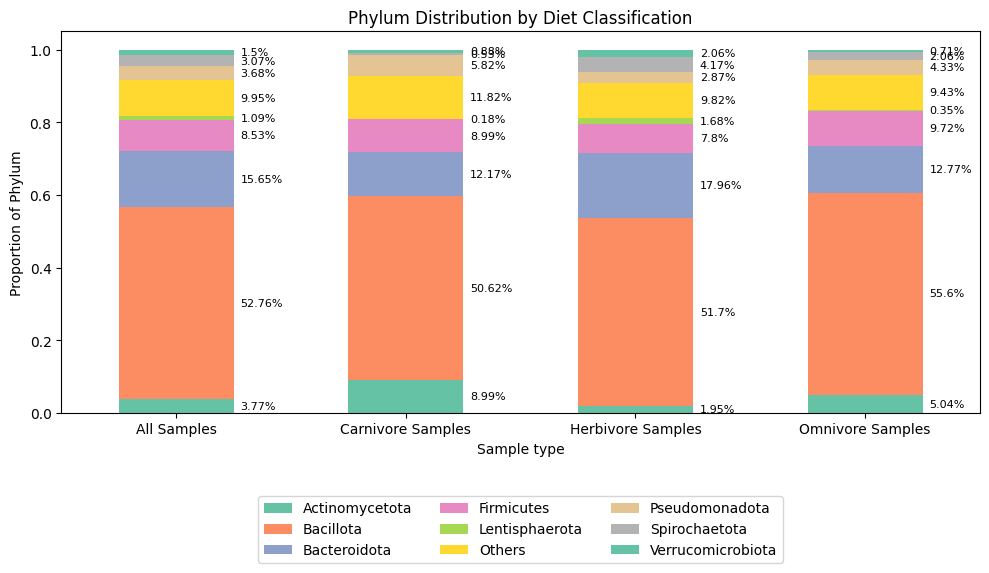

In [128]:
phylum_counts_all = drep['phylum_grouped'].value_counts()
phylum_counts_omn = drep[drep['diet classification']=='Omnivore']['phylum_grouped'].value_counts()
phylum_counts_car = drep[drep['diet classification']=='Carnivore']['phylum_grouped'].value_counts()
phylum_counts_herb = drep[drep['diet classification']=='Herbivore']['phylum_grouped'].value_counts()

# Combine counts into a single DataFrame for plotting
df_counts = pd.DataFrame({
    'All Samples': phylum_counts_all,
    'Carnivore Samples': phylum_counts_car,
    'Herbivore Samples': phylum_counts_herb,
    'Omnivore Samples':phylum_counts_omn
}).fillna(0)

# Normalize the counts to get proportions for stacked bars
df_counts_normalized = df_counts.div(df_counts.sum(axis=0), axis=1)

# Plot the stacked bar chart

n_phyla = df_counts_normalized.shape[0]
colors = sns.color_palette("Set2", n_colors=n_phyla)

ax = df_counts_normalized.transpose().plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)

# Add labels and title
ax.set_xlabel('Sample type')
ax.set_ylabel('Proportion of Phylum')
ax.set_title('Phylum Distribution by Diet Classification')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for i, patch in enumerate(ax.patches):
    # Calculate the position for the annotation
    height = patch.get_height()  # height of the segment (proportion)
    x = patch.get_x() + patch.get_width() / 2  # x-position of the segment
    y = patch.get_y() + height / 2  # y-position of the segment
    percentage = round(height * 100, 2)  # Proportion to percentage
    
    # Annotate each segment with the proportion percentage
    ax.annotate(f'{percentage}%', (x + 0.28, y), ha='left', va='center', fontsize=8, color='black')

# Display the plot
plt.tight_layout()
plt.show()

In [199]:
len(drep['class'].unique())

45

In [204]:
drep.isnull().sum()

gtdb_taxonomy                        0
taxonomy                             0
NCBI_ID                              0
ani95_cluster                        0
ani975_cluster                    4594
sample                               0
Zoo/Lab                            159
ZA_number                            0
Animal Species                       0
Susceptibility (Conservative)     2163
Susceptibility (Broad)               0
Animal class/order                   0
Age (y)                            284
Sex                                284
Zoo ID/Name (if applicable)        254
Diet                              3379
Pertinent medical history/info    2465
Place of Birth                    1825
Other Housing Locations (IA)      2357
Collection Date                   3285
Receipt Date                       159
Special note                      4543
diet classification                  0
superkingdom                         0
phylum                             108
class                    

In [203]:
len(drep['phylum'].unique())

32

In [200]:
drep.columns

Index(['gtdb_taxonomy', 'taxonomy', 'NCBI_ID', 'ani95_cluster',
       'ani975_cluster', 'sample', 'Zoo/Lab', 'ZA_number', 'Animal Species',
       'Susceptibility (Conservative)', 'Susceptibility (Broad)',
       'Animal class/order', 'Age (y)', 'Sex', 'Zoo ID/Name (if applicable)',
       'Diet', 'Pertinent medical history/info', 'Place of Birth',
       'Other Housing Locations (IA)', 'Collection Date', 'Receipt Date',
       'Special note', 'diet classification', 'superkingdom', 'phylum',
       'class', 'order', 'family', 'genus', 'species', 'Rank',
       'Susceptibility (binary)', 'phylum_grouped', 'max_value', 'is_novel'],
      dtype='object')

# novel genomes

In [131]:
max_ani=pd.read_csv('max_ani.csv',index_col=0)

In [138]:
drep=drep.merge(max_ani, how='left', left_index=True, right_index=True)

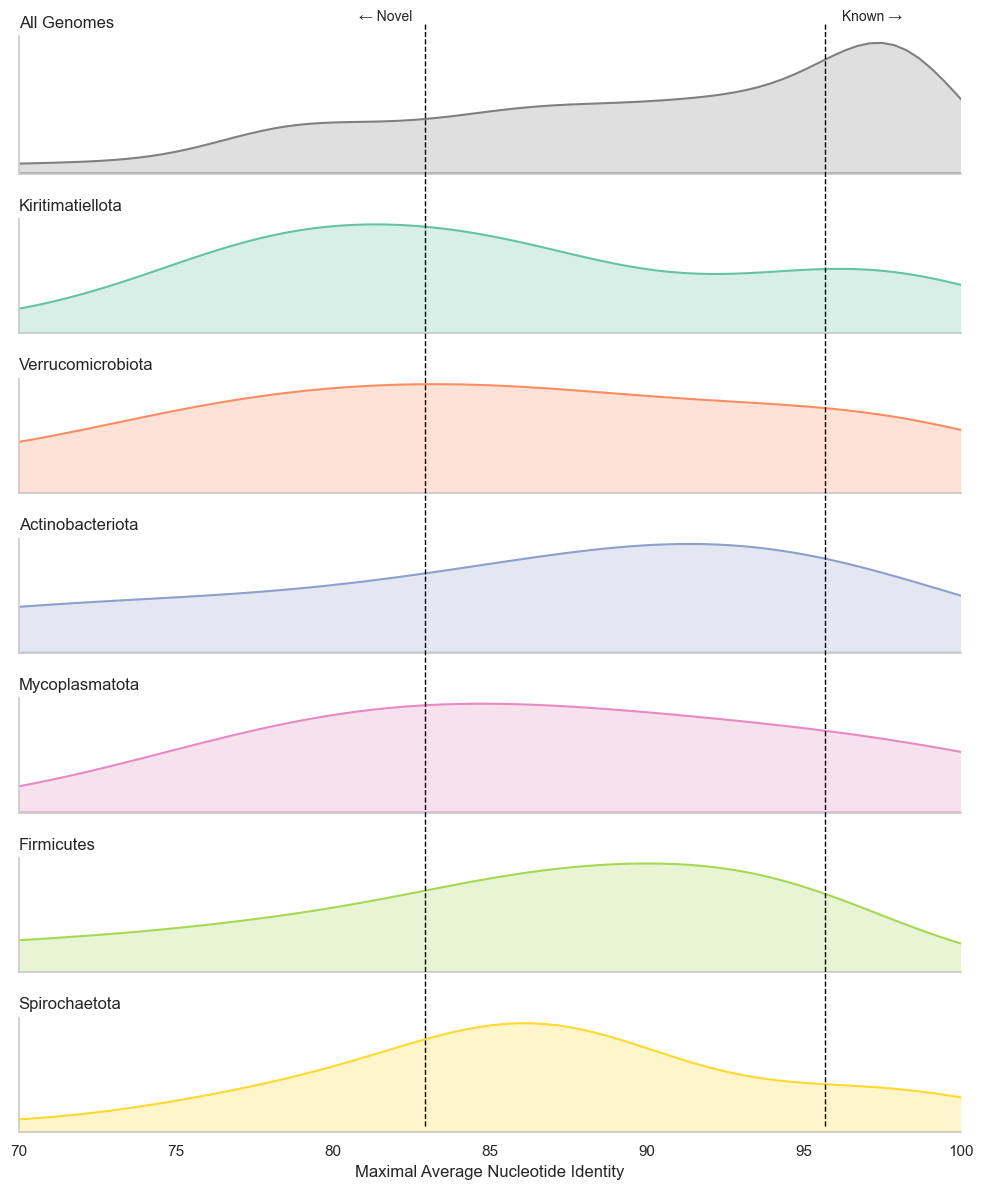

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'drep' DataFrame is preloaded with 'max_value' and 'phylum'
drep['max_value'] = pd.to_numeric(drep['max_value'], errors='coerce')
drep['is_novel'] = drep['max_value'] < 83

# Filter phyla with more than 20 genomes
phylum_stats = drep.groupby('phylum').agg(
    total=('max_value', 'count'),
    novel=('is_novel', 'sum')
)
phylum_stats['novel_pct'] = phylum_stats['novel'] / phylum_stats['total']
phylum_stats = phylum_stats[phylum_stats['total'] > 20]

# Top 6 phyla with most novel %
top_phyla = phylum_stats.sort_values('novel_pct', ascending=False).head(6).index.tolist()
plot_data = drep[drep['phylum'].isin(top_phyla)].dropna(subset=['max_value'])

# Set phylum order for plotting
plot_data['phylum'] = pd.Categorical(
    plot_data['phylum'],
    categories=phylum_stats.loc[top_phyla].sort_values('novel_pct', ascending=False).index,
    ordered=True
)

# Create subplots
fig, axes = plt.subplots(nrows=7, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios':[1.2]+[1]*6})

# Clean look
for ax in axes:
    ax.set_facecolor('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Plot "All Genomes"
sns.kdeplot(data=drep, x='max_value', fill=True, ax=axes[0], color='gray', linewidth=1.5)
axes[0].set_title("All Genomes", loc='left')

# Plot top 6 phyla
palette = sns.color_palette("Set2", n_colors=6)
color_dict = dict(zip(top_phyla, palette))
for i, phylum in enumerate(plot_data['phylum'].cat.categories):
    ax = axes[i+1]
    data = plot_data[plot_data['phylum'] == phylum]
    sns.kdeplot(data=data, x='max_value', fill=True, ax=ax, color=color_dict[phylum], linewidth=1.5)
    ax.set_title(phylum, loc='left')

# Remove y-ticks and set limits
for ax in axes:
    ax.set_xlim(70, 100)
    ax.set_yticks([])
    ax.set_ylabel("")

axes[-1].set_xlabel("Maximal Average Nucleotide Identity")

# Draw global vertical lines on each subplot at 83 and 95
# for ax in axes:
#     ax.axvline(83, color='black', linestyle='--', linewidth=1)
#     ax.axvline(95, color='black', linestyle='--', linewidth=1)

# Add global labels for the thresholds
def data_to_fig_x(val, ax):
    return (val - ax.get_xlim()[0]) / (ax.get_xlim()[1] - ax.get_xlim()[0])

# Get the figure coordinates for the top and bottom of the axes (from first and last subplot)
top_ax = axes[0]
bottom_ax = axes[-1]

# Get y-axis bounds in figure coordinates
y0 = bottom_ax.get_position().y0  # bottom of last subplot
y1 = top_ax.get_position().y1     # top of first subplot

# Convert 83 and 95 to figure-relative x-coords
x83 = data_to_fig_x(83, axes[0])
x95 = data_to_fig_x(95, axes[0])

# Add vertical dashed lines only within subplot region (not across entire figure)
fig.lines.extend([
    plt.Line2D([x83, x83], [y0-0.05, y1+0.1], transform=fig.transFigure, color='black', linestyle='--', linewidth=1),
    plt.Line2D([x95, x95], [y0-0.05, y1+0.1], transform=fig.transFigure, color='black', linestyle='--', linewidth=1)
])


x_min, x_max = axes[0].get_xlim()

# Add the annotations with the x-values (83, 95) in data space
fig.text(0.85, 0.99, 'Known →', fontsize=10, va='top')
fig.text(0.42, 0.99, '← Novel', fontsize=10, va='top', ha='right')

plt.tight_layout(h_pad=1.5)
plt.show()


In [147]:
phylum_stats

,total,novel,novel_pct
phylum,,,
Actinobacteriota,44,19,0.431818
Actinomycetota,173,32,0.184971
Bacillota,2424,620,0.255776
Bacteroidota,719,131,0.182197
Campylobacterota,31,5,0.161290
Candidatus Melainabacteria,30,5,0.166667
Firmicutes,392,148,0.377551
Fusobacteriota,23,4,0.173913
Kiritimatiellota,26,12,0.461538


In [176]:
len(drep[drep['max_value']<=83])

1192

In [177]:
len(drep[drep['max_value']>=95])

1547

In [178]:
len(drep[(drep['max_value']>83) &(drep['max_value']<95)])

1855

In [ ]:
# drep.to_csv('taxonomy_feature.csv')

In [187]:
drep['Animal class/order']

Name
wild_biome_1~_~ZA_102_combined.metabat.101        Primates
wild_biome_1~_~ZA_102_combined.metabat.106        Primates
wild_biome_1~_~ZA_102_combined.metabat.126        Primates
wild_biome_1~_~ZA_102_combined.metabat.164_sub    Primates
wild_biome_1~_~ZA_102_combined.metabat.173        Primates
                                                    ...   
wild_biome_5~_~ZA_84_SemiBin_433                  Primates
wild_biome_5~_~ZA_84_SemiBin_45                   Primates
wild_biome_5~_~ZA_98.metabat.81_sub               Primates
wild_biome_5~_~ZA_98_SemiBin_110                  Primates
wild_biome_5~_~ZA_98_SemiBin_85                   Primates
Name: Animal class/order, Length: 4594, dtype: object

C:\Users\11357\AppData\Local\Temp\ipykernel_33316\2645792909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='max_value', y='Animal class/order', data=drep, palette='Set2')


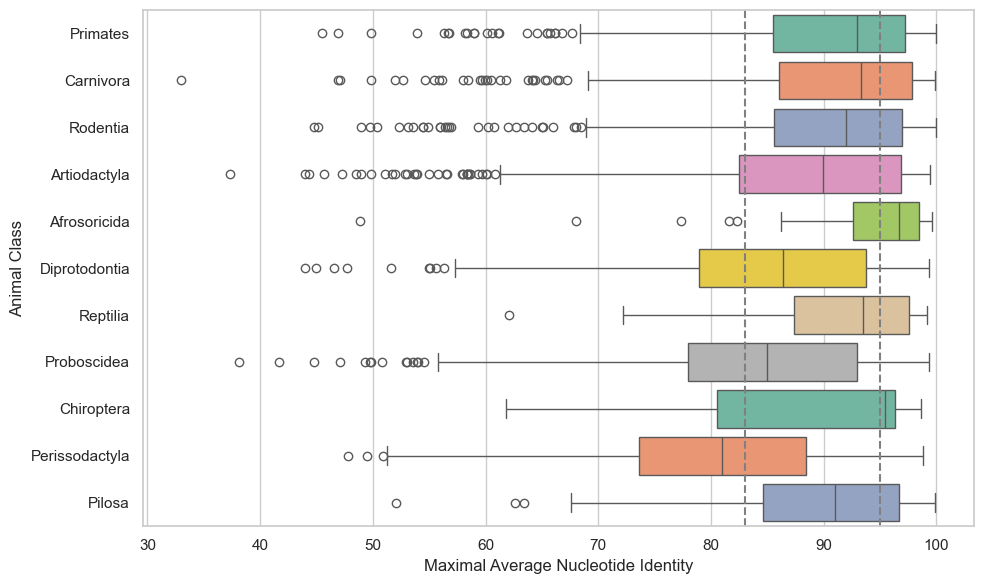

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='max_value', y='Animal class/order', data=drep, palette='Set2')
plt.axvline(95, ls='--', color='gray')  # Known threshold
plt.axvline(83, ls='--', color='gray')  # Novel threshold
plt.xlabel("Maximal Average Nucleotide Identity")
plt.ylabel("Animal Class")
plt.tight_layout()
plt.show()

# Clean frequency file

In [93]:
aduance=pd.read_csv('all-to-all-profile.tsv',sep='\t')

In [94]:
aduance[aduance['Genome_file']=='/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild_biome/drep_res/95ANI/dereplicated_genomes/wild_biome_2~_~ZA_161_SemiBin_921.fa.gz']

,Sample_file,Genome_file,Taxonomic_abundance,Sequence_abundance,Adjusted_ANI,Eff_cov,ANI_5-95_percentile,Eff_lambda,Lambda_5-95_percentile,Median_cov,Mean_cov_geq1,Containment_ind,Naive_ANI,kmers_reassigned,Contig_name
0,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,14.6405,17.0677,98.51,653.000,NA-NA,HIGH,NA-NA,653,635.531,7402/11782,98.51,9,wild_biome_2~_~ZA_161_k141_695031
6221,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,1.6174,1.9026,100.00,27.000,NA-NA,HIGH,NA-NA,27,26.863,11781/11782,100.00,0,wild_biome_2~_~ZA_161_k141_695031
9248,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,0.4753,0.6475,98.67,7.652,NA-NA,HIGH,NA-NA,8,7.652,7791/11782,98.67,40,wild_biome_2~_~ZA_161_k141_695031
17928,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,4.3458,4.8168,98.55,39.000,NA-NA,HIGH,NA-NA,39,38.368,7493/11782,98.55,18,wild_biome_2~_~ZA_161_k141_695031
19178,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,0.1885,0.2497,98.52,4.009,NA-NA,HIGH,NA-NA,4,4.009,7418/11782,98.52,36,wild_biome_2~_~ZA_161_k141_695031
22945,/manitou/pmg/projects/korem_lab/Data/mLevy_202...,/burg/pmg/users/qf2173/mmmbp_animal/mmmbp_wild...,0.1546,0.1821,98.52,1.144,98.42-98.67,1.144,1.06-1.21,1,1.700,5060/11782,97.31,19,wild_biome_2~_~ZA_161_k141_695031


In [95]:
import re
aduance['Sample_file'] = aduance["Sample_file"].apply(lambda x: x.split("/")[-1].replace(".fastq.gz", ""))
aduance['Genome_file'] = aduance["Genome_file"].apply(lambda x: x.split("/")[-1].replace(".fa.gz", ""))
def clean_sample_name(full_name):
    try:
        part = full_name.split("~_~")[1]  # get part after ~_~
        return "_".join(part.split("_")[:2]) if "BALB" not in part else "_".join(part.split("_")[:3])
    except IndexError:
        return full_name

# Apply to Sample column
aduance["Sample_file"] = aduance["Sample_file"].apply(lambda x: clean_sample_name(x.split("/")[-1]))

In [98]:
aduance = aduance[~aduance['Sample_file'].str.contains('Pos_DNA', na=False)]

In [100]:
aduance['Sample_file'].value_counts()

Sample_file
ZA_76     417
ZA_6      386
ZA_48     374
ZA_7      358
ZA_8      355
         ... 
ZA_64       6
ZA_111      6
ZA_67       6
ZA_68       5
ZA_128      3
Name: count, Length: 158, dtype: int64

In [102]:
aduance['Genome_file'].value_counts()

Genome_file
wild_biome_2~_~ZA_91_combined_SemiBin_453         71
wild_biome_1~_~ZA_92_SemiBin_19                   66
wild_biome_4~_~ZA_21_combined_SemiBin_21_sub      61
wild_biome_3~_~ZA_15_SemiBin_48                   61
wild_biome_1~_~ZA_57_combined.metabat.56          60
                                                  ..
wild_biome_5~_~ZA_80_SemiBin_652                   1
wild_biome_1~_~ZA_102_combined_SemiBin_578         1
wild_biome_1~_~ZA_102_combined_SemiBin_339_sub     1
wild_biome_1~_~ZA_102_combined_SemiBin_281         1
wild_biome_1~_~ZA_102_combined.metabat.173         1
Name: count, Length: 4679, dtype: int64

In [ ]:
# aduance[['Sample_file','Genome_file','Taxonomic_abundance','Sequence_abundance']].set_index('Sample_file').to_csv('clean_frequency.csv')